In [1]:
include("../alpcahFamily.jl")
include("../helperFunctions.jl")
using LinearAlgebra
using Plots
using LaTeXStrings

In [2]:
function run_trials_pca(ambient,d,points,vars, trials)
    error = zeros(trials)
    bound = zeros(trials)
    for i=1:trials
        num_points = sum(points)
        U = generateSubspace(ambient, d)
        Y, X = generateData(U, vars, points; coordinateWindow=10, lowRankData=true)
        U_PCA = PCA(Y, d)
        error[i] = opnorm(U*U' - U_PCA*U_PCA')^2
        # bound
        variances = vcat(vars[1]*ones(points[1]), vars[2]*ones(points[2]))
        vsum_1 = sum(variances)
        vsum_2 = sum(variances.^2)
        vmax = maximum(variances)
        D,N = size(Y)
        num = (sqrt(vsum_1) + sqrt(D*vmax) + (3*D*vsum_2)^(1/4) )^2
        den = N*svdvals((1/N)*X*X')[d]
        bound[i] = num/den
    end
    return error, bound
end

function run_trials_alpcah(ambient,d,points,vars, trials)
    error = zeros(trials)
    for i=1:trials
        num_points = sum(points)
        U = generateSubspace(ambient, d)
        Y, X = generateData(U, vars, points; coordinateWindow=10, lowRankData=true)
        U_ALPCAH = LR_ALPCAH(Y,d; alpcahIter = 10)
        error[i] = opnorm(U*U' - U_ALPCAH*U_ALPCAH')^2
    end
    return error
end

run_trials_alpcah (generic function with 1 method)

In [25]:
d = 3
ambient = 100
points = vec([30; 1000-30]);
vmin = 0.1
vmax = 75

vsize = 25
trials = 25
vrange = range(vmin, vmax, vsize)

errorPCA = zeros(vsize)
maxPCA = zeros(vsize)
minPCA = zeros(vsize)

maxALPCAH = zeros(vsize)
minALPCAH= zeros(vsize)
errorALPCAH = zeros(vsize)

boundPCA = zeros(vsize)

for j=1:vsize
    vars = vec([vmin; vrange[j]])
    vec_pca, vec_bound = run_trials_pca(ambient, d, points, vars, trials)
    errorPCA[j], boundPCA[j] = mean(vec_pca), mean(vec_bound)
    maxPCA[j], minPCA[j] = maximum(vec_pca), minimum(vec_pca)

    vec_alpcah = run_trials_alpcah(ambient, d, points, vars, trials)
    errorALPCAH[j] = mean(vec_alpcah)
    maxALPCAH[j], minALPCAH[j] = maximum(vec_alpcah), minimum(vec_alpcah)
end

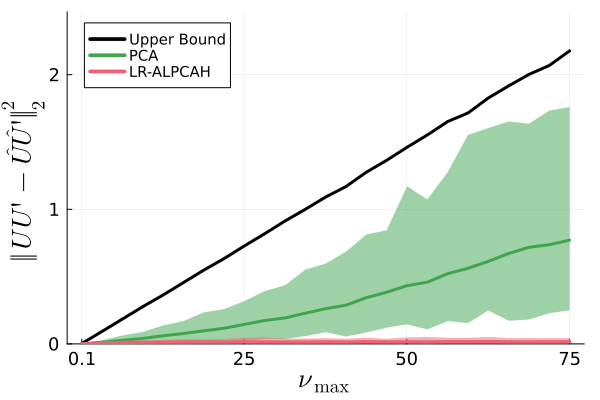

In [28]:
using Plots.Measures
colors = palette(:default)
plot(xlabel=L"\nu_\mathrm{max}", ylabel=L" ‖ U U' - \hat{U} \hat{U}' ‖_2^2", ylim=(0, (pi^2)/4), legendfontpointsize=10,xtickfontsize=12,ytickfontsize=12,guidefontsize=18, left_margin=2mm,right_margin=2mm, xticks=([0.1,25,50,75], ["0.1", "25", "50", "75"]), yticks=([0.0, 1.0, 2.0], ["0", "1", "2"]))
plot!(vrange, 0.22*boundPCA, label="Upper Bound", linewidth=3, color=:black)
plot!(vrange, errorPCA, ribbon=(minPCA, maxPCA), linewidth=3, label="PCA", color=colors[3])
plot!(vrange, errorALPCAH, ribbon = (minALPCAH, maxALPCAH), label="LR-ALPCAH", linewidth=3, color=colors[end-2])
#savefig("bound.pdf")